# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd 

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv", 
                   sep = ",")
data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,52513,2201,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328
5,NaN,NaN,NaN,Antigua and Barbuda,2021-01-02 05:22:33,17.060800,-61.796400,159,5,148,6.0,Antigua and Barbuda,162.364186,3.144654
6,NaN,NaN,NaN,Argentina,2021-01-02 05:22:33,-38.416100,-63.616700,1629594,43319,1426676,159599.0,Argentina,3605.633332,2.658269
7,NaN,NaN,NaN,Armenia,2021-01-02 05:22:33,40.069100,45.038200,159738,2828,143355,13555.0,Armenia,5390.664389,1.770399
8,NaN,NaN,Australian Capital Territory,Australia,2021-01-02 05:22:33,-35.473500,149.012400,118,3,114,1.0,"Australian Capital Territory, Australia",27.563653,2.542373
9,NaN,NaN,New South Wales,Australia,2021-01-02 05:22:33,-33.868800,151.209300,4947,54,0,1696.0,"New South Wales, Australia",60.938655,1.091571


#### Display the top 5 rows in the data

In [9]:
data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328


#### Show the information of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
FIPS                   3265 non-null float64
Admin2                 3270 non-null object
Province_State         3811 non-null object
Country_Region         3984 non-null object
Last_Update            3984 non-null object
Lat                    3897 non-null float64
Long_                  3897 non-null float64
Confirmed              3984 non-null int64
Deaths                 3984 non-null int64
Recovered              3984 non-null int64
Active                 3983 non-null float64
Combined_Key           3984 non-null object
Incident_Rate          3895 non-null float64
Case_Fatality_Ratio    3940 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.8+ KB


#### Show the sum of missing values of features in the dataset

In [29]:
data.isna().sum()

FIPS                   719
Admin2                 714
Province_State         173
Country_Region           0
Last_Update              0
Lat                     87
Long_                   87
Confirmed                0
Deaths                   0
Recovered                0
Active                   1
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     44
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [30]:
data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [46]:
data.loc[:,['Country_Region','Confirmed']].groupby('Country_Region').sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,52513
1,Albania,58316
2,Algeria,99897
3,Andorra,8117
4,Angola,17568
5,Antigua and Barbuda,159
6,Argentina,1629594
7,Armenia,159738
8,Australia,28460
9,Austria,362911


#### Show the number of Deaths by Country

In [50]:
data.loc[:,['Country_Region','Deaths']].groupby('Country_Region').sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,2201
1,Albania,1181
2,Algeria,2762
3,Andorra,84
4,Angola,405
5,Antigua and Barbuda,5
6,Argentina,43319
7,Armenia,2828
8,Australia,909
9,Austria,6261


#### Show the number of Recovered cases by Country

In [55]:
data.loc[:,['Country_Region','Recovered']].groupby('Country_Region').sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,41727
1,Albania,33634
2,Algeria,67395
3,Andorra,7463
4,Angola,11146
5,Antigua and Barbuda,148
6,Argentina,1426676
7,Armenia,143355
8,Australia,22573
9,Austria,334901


#### Show the number of Active Cases by Country

In [101]:
# replacing NaN values of Active column by zeroes
data.Active = data.Active.fillna(0)
data.Active.isnull().sum()

0

In [106]:
# Convert from float64 to int64
int_converter = lambda x: int(x)
data.Active  = data.Active.apply(int_converter)
data.Active.head()


0        0
1    23501
2    29740
3      570
4     6017
Name: Active, dtype: int64

In [105]:
data.loc[:,['Country_Region','Active']].groupby('Country_Region').sum().reset_index()

,Country_Region,Active
0,Afghanistan,0
1,Albania,23501
2,Algeria,29740
3,Andorra,570
4,Angola,6017
5,Antigua and Barbuda,6
6,Argentina,159599
7,Armenia,13555
8,Australia,1781
9,Austria,21749


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [109]:
data.loc[:,['Country_Region','Confirmed','Deaths','Recovered','Active']].groupby('Country_Region').sum().reset_index()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,52513,2201,41727,0
1,Albania,58316,1181,33634,23501
2,Algeria,99897,2762,67395,29740
3,Andorra,8117,84,7463,570
4,Angola,17568,405,11146,6017
5,Antigua and Barbuda,159,5,148,6
6,Argentina,1629594,43319,1426676,159599
7,Armenia,159738,2828,143355,13555
8,Australia,28460,909,22573,1781
9,Austria,362911,6261,334901,21749


### Question 3

### Show the countries with no recovered cases

In [124]:
recovered = data.loc[:,['Country_Region','Recovered']].groupby('Country_Region').sum().reset_index()
recovered[recovered['Recovered'] == 0]

,Country_Region,Recovered
16,Belgium,0
91,Kiribati,0
133,Palau,0
153,Serbia,0
166,Summer Olympics 2020,0
168,Sweden,0
180,US,0


#### Show the countries with no confirmed cases

In [130]:
confirmed = data.loc[:,['Country_Region','Confirmed']].groupby('Country_Region').sum().reset_index()
confirmed[confirmed['Confirmed'] == 0]

,Country_Region,Confirmed
91,Kiribati,0
133,Palau,0
166,Summer Olympics 2020,0


#### Show the countries with no deaths

In [134]:
deaths = data.loc[:,['Country_Region','Deaths']].groupby('Country_Region').sum().reset_index()
deaths[deaths['Deaths'] == 0]

,Country_Region,Deaths
19,Bhutan,0
30,Cambodia,0
50,Dominica,0
69,Grenada,0
75,Holy See,0
91,Kiribati,0
96,Laos,0
112,Marshall Islands,0
133,Palau,0
145,Saint Kitts and Nevis,0


In [135]:
deaths = data.loc[:,['Country_Region', 'Confirmed','Deaths','Recovered']].groupby('Country_Region').sum().reset_index()
deaths[deaths['Deaths'] == 0]

,Country_Region,Confirmed,Deaths,Recovered
19,Bhutan,689,0,449
30,Cambodia,379,0,362
50,Dominica,88,0,83
69,Grenada,127,0,107
75,Holy See,27,0,15
91,Kiribati,0,0,0
96,Laos,41,0,40
112,Marshall Islands,4,0,4
133,Palau,0,0,0
145,Saint Kitts and Nevis,32,0,29


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [143]:
# Select the data
countries_confirmed = data.loc[:, ['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
# Group by Country Region
(countries_confirmed.groupby('Country_Region').sum().sort_values('Confirmed', ascending=False))[0:10]

,Confirmed,Deaths,Recovered
Country_Region,,,
US,20318112,354136,0
India,10325823,149474,9929568
Brazil,7700578,195411,6855372
Russia,3153960,56798,2553467
France,2697014,64891,200822
United Kingdom,2549693,74237,5682
Turkey,2220855,21093,2114760
Italy,2129376,74621,1479988
Spain,1928265,50837,150376


#### Show the Top 10 Countries with Active cases

In [145]:
# Select the data
countries_active = data.loc[:, ['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
# Group by Country Region
(countries_active.groupby('Country_Region').sum().sort_values('Active', ascending=False))[0:10]

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,20318112,354136,0,19780905
United Kingdom,2549693,74237,5682,2469773
France,2697014,64891,200822,2431300
Spain,1928265,50837,150376,1727052
Netherlands,816616,11624,9651,795341
Brazil,7700578,195411,6855372,649795
Belgium,648289,19581,0,628708
Italy,2129376,74621,1479988,574767
Russia,3153960,56798,2553467,543695


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [191]:
import matplotlib.pyplot as plt

In [164]:
data_plot = data.loc[: ,['Country_Region', 'Deaths', 'Confirmed', 'Recovered', 'Active']]
data_plot = data_plot.groupby('Country_Region').sum().sort_values('Deaths', ascending=False)
data_plot = data_plot[data_plot['Deaths'] > 50000]
data_plot

,Deaths,Confirmed,Recovered,Active
Country_Region,,,,
US,354136,20318112,0,19780905
Brazil,195411,7700578,6855372,649795
India,149474,10325823,9929568,254254
Mexico,126507,1437185,1083768,226910
Peru,93231,1015137,951318,26139
Italy,74621,2129376,1479988,574767
United Kingdom,74237,2549693,5682,2469773
France,64891,2697014,200822,2431300
Russia,56798,3153960,2553467,543695


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


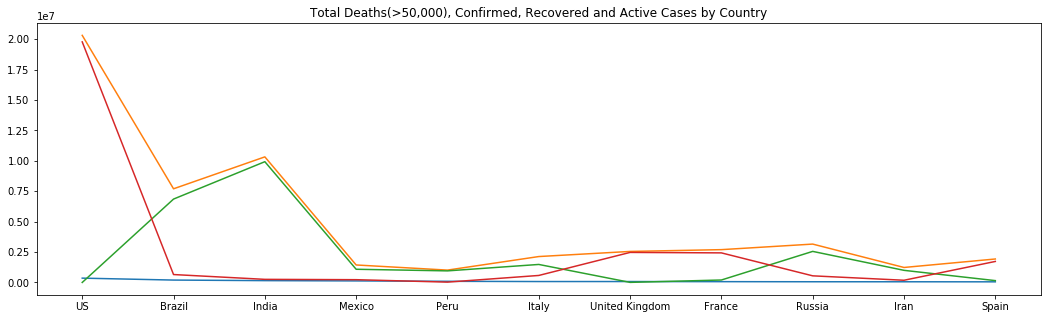

In [189]:
fig = plt.figure(figsize=(18, 5))
plt.title('Total Deaths(>50,000), Confirmed, Recovered and Active Cases by Country')
ax = fig.add_subplot(111)
ax.plot(data_plot)

### Question 6

### Plot Province/State wise Deaths in USA

In [194]:
import plotly.express as px

In [195]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [196]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [221]:
covid_us = covid_data[covid_data['Country_Region'] == 'US']

In [223]:
covid_province = covid_us.loc[:, ['Province_State', 'Deaths']]
covid_province = covid_province.groupby('Province_State').sum()
covid_province

,Deaths
Province_State,
Alabama,5299
Alaska,224
Arizona,10036
Arkansas,4010
California,29732
Colorado,5190
Connecticut,6324
Delaware,1128
Diamond Princess,0


In [228]:
px.bar(covid_province.reset_index(), x='Province_State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')

### Question 7

### Plot Province/State Wise Active Cases in USA

In [229]:
covid_province = covid_us.loc[:, ['Province_State', 'Active']]
covid_province = covid_province.groupby('Province_State').sum()
covid_province

,Active
Province_State,
Alabama,393851.0
Alaska,49734.0
Arizona,597309.0
Arkansas,247736.0
California,2645555.0
Colorado,353757.0
Connecticut,199670.0
Delaware,63506.0
Diamond Princess,49.0


In [231]:
px.bar(covid_province.reset_index(), x='Province_State', y='Active', title='State wise active cases of COVID-19 in USA', text='Active')

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [233]:
covid_province = covid_us.loc[:, ['Province_State', 'Confirmed']]
covid_province = covid_province.groupby('Province_State').sum()
covid_province

,Confirmed
Province_State,
Alabama,399150
Alaska,49979
Arizona,607345
Arkansas,251746
California,2770361
Colorado,358947
Connecticut,205994
Delaware,64475
Diamond Princess,49


In [234]:
px.bar(covid_province.reset_index(), x='Province_State', y='Confirmed', title='State wise confirmed cases of COVID-19 in USA', text='Confirmed')

In [239]:
# replacing NaN values of Active column by zeroes
covid_us.Active = covid_us.Active.fillna(0)
covid_us.Active.isnull().sum()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0

In [240]:
# Convert from float64 to int64
int_converter = lambda x: int(x)
covid_us.Active  = covid_us.Active.apply(int_converter)
covid_us.Active.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



650     4794
651    15029
652     1613
653     1990
654     4970
Name: Active, dtype: int64

In [248]:
covid_province = covid_us.loc[:, ['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
covid_province = covid_province.groupby('Province_State').sum()
covid_province.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
Province_State    58 non-null object
Confirmed         58 non-null int64
Deaths            58 non-null int64
Recovered         58 non-null int64
Active            58 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.3+ KB


In [264]:
px.bar(covid_province.reset_index(), 
        x='Province_State', y=['Confirmed', 'Deaths', 'Recovered', 'Active'], barmode='group')

### Question 9

### Plot Worldwide Confirmed Cases over time

In [265]:
import plotly.express as px
import plotly.io as pio

In [266]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [272]:
covid_last = covid_data.loc[: ,['Last_Update', 'Confirmed']]
covid_last = covid_last.groupby('Last_Update').sum()
covid_last = covid_last.reset_index()
covid_last

,Last_Update,Confirmed
0,2020-08-04 02:27:56,152
1,2020-08-07 22:34:20,0
2,2020-12-21 13:27:30,788
3,2021-01-08 23:22:27,196
4,2021-01-10 05:22:12,89843066
5,2021-04-02 15:13:53,399


In [273]:
px.line(covid_last, x='Last_Update', y='Confirmed', title = 'Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time')